# DATA

# CO CALIBRATION

In [495]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [496]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
#Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
#Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.sample(frac=1)

In [497]:
CO_Data=CO_Data.resample('20min').mean()
CO_Data=CO_Data.dropna()
CO_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2019-10-02 11:40:00,3571.592599,26.378438,58.063437,312.707200,984.426875,10.0,2.0,2.0,11.0
2019-10-02 12:00:00,3108.940622,25.632544,48.527009,188.164925,900.879534,10.0,2.0,2.0,12.0
2019-10-02 12:20:00,2614.641410,25.811435,53.792695,269.273025,746.248697,10.0,2.0,2.0,12.0
2019-10-02 15:40:00,3313.026561,30.623188,49.580620,259.460975,914.638179,10.0,2.0,2.0,15.0
2019-10-03 15:40:00,535.086842,29.421250,52.411845,341.897275,152.440810,10.0,3.0,3.0,15.0


In [498]:
#Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-0.7*np.std(Ref), np.mean(Ref)+0.7*np.std(Ref))]
#CO_Data.shape

In [499]:
sub= str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

In [500]:
print('O2'.translate(sub))

O₂


In [501]:
print(r'$O_{2}$')

$O_{2}$


In [502]:
import pandas as pd
import numpy as np
R1_data= pd.read_csv('R1_data.csv')
R1_data.columns=['Sen_2.5','Sen_10','Ref_2.5','Ref_10','Time','T','RH']
R1_data=R1_data.dropna()
Time=R1_data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
R1_data['Date'] = Date.tolist()
R1_data=R1_data.set_index('Date')
R1_data.drop('Time',axis = 1, inplace = True)
R1_data['Month']=R1_data.index.month
R1_data['Day_of_week']=R1_data.index.dayofweek
R1_data['Hour']=R1_data.index.hour
R1_data=R1_data.resample('10min').mean()
R1_data=R1_data.dropna()
R1_data.head()

,Sen_2.5,Sen_10,Ref_2.5,Ref_10,T,RH,Month,Day_of_week,Hour
Date,,,,,,,,,
2019-10-02 11:50:00,112.477418,112.477418,18.583300,32.754810,26.378438,58.063437,10.0,2.0,11.0
2019-10-02 12:10:00,9.696690,40.138927,17.201155,31.342380,25.652438,48.442262,10.0,2.0,12.0
2019-10-02 12:20:00,68.966260,81.577428,16.845975,30.682855,25.813062,53.801740,10.0,2.0,12.0
2019-10-02 15:40:00,7.471156,44.234396,19.076640,35.864505,30.589409,49.682787,10.0,2.0,15.0
2019-10-03 15:50:00,9.744537,144.047407,17.341335,29.977575,29.364176,52.513747,10.0,3.0,15.0


In [503]:
import pandas as pd
import numpy as np
N3_data= pd.read_csv('N3_data.csv')
N3_data.columns=['Sen_2.5','Sen_10','Ref_2.5','Ref_10','Time','T','RH']
N3_data=N3_data.dropna()
Time=N3_data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
N3_data['Date'] = Date.tolist()
N3_data=N3_data.set_index('Date')
N3_data.drop('Time',axis = 1, inplace = True)
N3_data['Month']=N3_data.index.month
N3_data['Day_of_week']=N3_data.index.dayofweek
N3_data['Hour']=N3_data.index.hour
N3_data=N3_data.resample('10min').mean()
N3_data=N3_data.dropna()
N3_data.head()

,Sen_2.5,Sen_10,Ref_2.5,Ref_10,T,RH,Month,Day_of_week,Hour
Date,,,,,,,,,
2019-10-02 12:00:00,7.972913,17.284141,17.700490,31.956415,24.827483,64.382667,10.0,2.0,12.0
2019-10-02 12:10:00,4.448633,10.763524,17.201155,31.342380,25.074930,54.874831,10.0,2.0,12.0
2019-10-02 12:20:00,3.378485,17.141379,17.062410,31.074470,25.445921,54.380000,10.0,2.0,12.0
2019-10-02 15:40:00,4.223667,13.522096,19.076640,35.864505,30.180843,55.684552,10.0,2.0,15.0
2019-10-02 15:50:00,4.301400,16.168827,19.210635,34.961880,30.316215,55.095438,10.0,2.0,15.0


# Outlier detection and removal

In [504]:
import numpy as np

import pandas as pd   
import seaborn as sns
from scipy import stats

((11151, 9), (11610, 9))

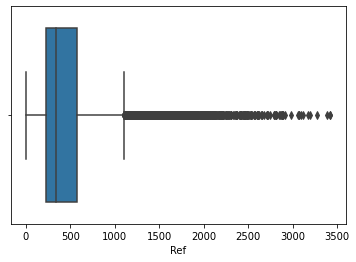

In [505]:
sns.boxplot(x=CO_Data['Ref'])
z=np.abs(stats.zscore(CO_Data))
CO_data=CO_Data[(z < 3).all(axis=1)]
CO_data.shape,CO_Data.shape

In [506]:
def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse
import random

# Relative Expanded  Uncertainty(REU)

In [507]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=0.05*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [508]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=ref_mean
    prec=np.array([20 for i in range(len(ref))])
    u=0.05*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [509]:
def target(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    #u=np.maximum(prec, 0.001*ref)
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)
    P=[]
    for i in range(len(P2)):
        P.append(P1+P2[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,50)
    A=(2*(np.array(P))**0.5/ref)*100
    #for i in range(len(P3)):
        #if P3[i]<0:
            #P3[i]=random.randint(0,50)
    B=(2*(np.array(P3))/ref)*100
    bias=[]
    random=[]
    Ref=[]
    part1=(Beta_0/ref)*100
    part=[beta_1-1 for i in range(len(ref))]
    part2=(np.array(part))*100
    PART1=[]
    PART2=[]
    for i in range(len(A)):
        if A[i]<500:
            random.append(A[i])
            bias.append(B[i])
            Ref.append(ref[i])
            PART1.append(part1[i])
            PART2.append(part2[i])
    return [random,bias,Ref, PART1,PART2]

In [510]:
from sklearn import linear_model
import numpy as np
Y=[20,40,60,80,100]
X=np.array([10,30,50,70,90]).reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 10.0
Coefficients: 
 [1.]


In [511]:
def target2(Y,X,u):
    from sklearn import linear_model
    import numpy as np
    x=np.array(Y).reshape(-1, 1)
    y=np.array(X).reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    b0=regr.intercept_
    b1=regr.coef_[0]
    RSS=sum((np.array(Y)-(b0[0]+b1[0]*np.array(X)))**2)
    RR=2*((RSS/((len(X)-2))-u**2)/np.array(X))**0.5
    RB=2*(b0/np.array(X)+(b1-1))
    return RR,RB

A=[200,360,288,290]
B=[204,336,267,301]
y=np.array(B).reshape(-1, 1)
RSS=sum((np.array(A)-(b0[0]+b1[0]*np.array(B)))**2)
RSS
RR=2*((RSS/((len(X)-2))-5**2)/np.array(X))**0.5
RR

x=np.array(A).reshape(-1, 1)
y=np.array(B).reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
b0=regr.intercept_
b1=regr.coef_[0]
b0[0]
b1[0]

target2(A,B,5)

B=np.array([20,20])
A=np.array([1,30])
C=np.array([A,B])
np.maximum(A,B)

In [512]:
Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

## Model 1: Linear Regression

In [513]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt

#X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
#y=CO_Data['Ref']
X=R1_data[['Sen_2.5','T','RH','Month','Day_of_week','Hour']]
y=R1_data['Ref_2.5']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2)
#train_test_split(X, y, test_size = 0.2)

In [514]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Sen_2.5'].to_list()

index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_CO=sMAPE_lr
RMSE_lr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_CO=Pearson_lr
sMAPE_lab_CO=sMAPE_lab
RMSE_lab_CO=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_CO=Pearson_lab
R2_lr_CO=round(sm.r2_score(y_test, pred), 2)
R2_lab_CO=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_CO=RMSE_lr
RMSE_Lab_CO=RMSE_lab

A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=120
Pearson_lr,RMSE_Lr_CO

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.6, 9.8)

In [515]:
cal=np.array(pred)
ref=np.array(y_test.to_list())
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
    #cal=np.log(cal)
    #ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+1)*(0.08*ref)**2)
du_s=RSS/(len(cal)-2)
Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P1

37.692547674117975

In [516]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV2)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV2)**2
P3=(Beta_0+(Beta_1-1)*LV2)
P=P1+P2+P3
Bias=(2*(P3)/LV2)*100
Random=(2*(P1+P2)**0.5/LV2)*100


import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

import numpy as np


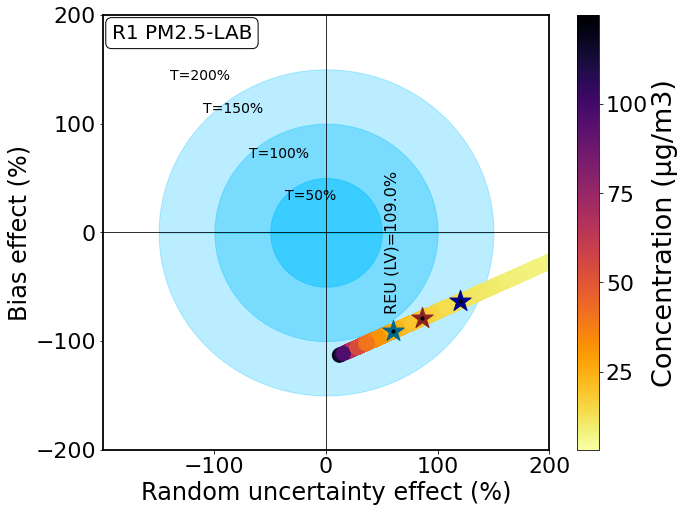

109.0212927105703


In [517]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM2.5-LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)
if U<200:
    plt.text(Random+3,Bias+16,'REU (LV)='+str(U)+'%',fontsize=16,rotation=90, rotation_mode='anchor')
plt.text(-37,30, 'T=50%',fontsize=14)
plt.text(-69,69, 'T=100%',fontsize=14)
plt.text(-110,110, 'T=150%',fontsize=14)
plt.text(-140,140, 'T=200%',fontsize=14)
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_2.5_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()
u=np.sqrt((Bias**2+Random**2))
print(u)


In [518]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

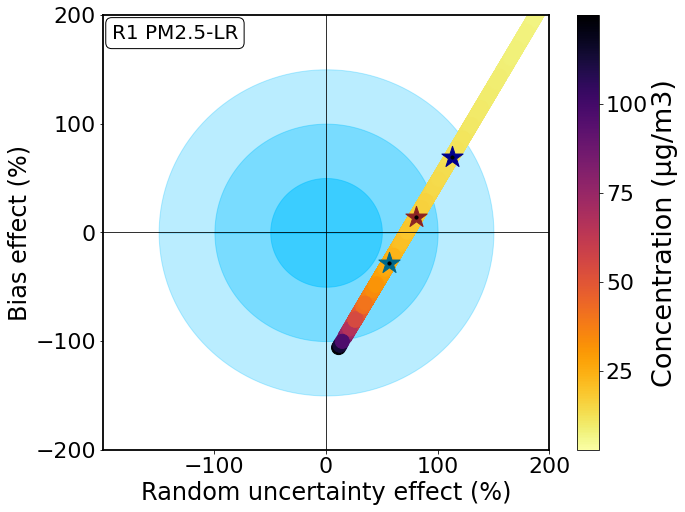

62.97709092448329


In [519]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)


plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM2.5-LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_2.5_LR.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.2)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C, r'$R^{2}(LR)=$'+str(R2_lr_CO), fontsize = 14, color='#513e00')
#plt.text(B-20, D, r'$R^{2}(Lab)=$' +str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [520]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_lr=pred
MBE_LR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_CO=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_CO=MBE(lab1,y_test)/np.std(y_test)
CRMSE_LAB_CO=CRMSE(y_test,lab1)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 7.15
Mean squared error(MSE) = 96.69
Median absolute error = 5.51
Explain variance score = 0.36
R2 score = 0.36


## Model 2 :  Support Vector Regression (SVR)

In [521]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))
pred_svr=pred

In [522]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)

Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_CO=sMAPE_lr
RMSE_svr_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_CO=Pearson_lr
R2_svr_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_CO=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C,r'$R^{2}(SVR)=$'+str(R2_svr_CO) , fontsize = 14, color='brown')
#plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_CO) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [523]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_svr=pred
MBE_SVR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 6.95
Mean squared error(MSE) = 101.25
Median absolute error = 4.87
Explain variance score = 0.34
R2 score = 0.33


In [524]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

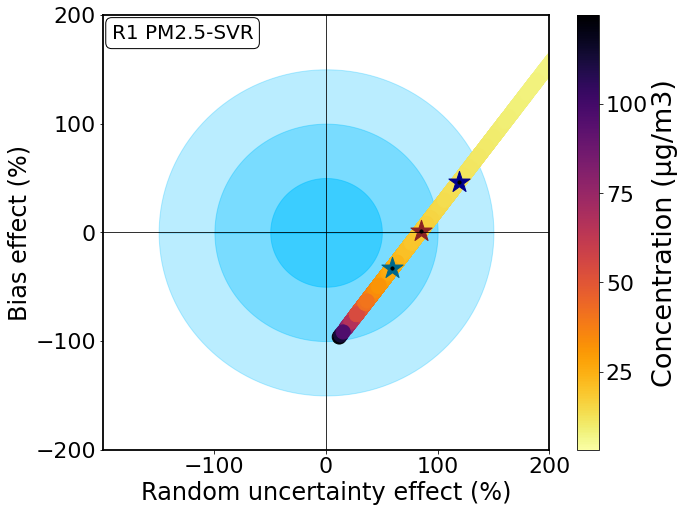

67.90015366001406


In [525]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM2.5-SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')

plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_2.5_SVR.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

## Model 3 : Random Forest

In [526]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [527]:
features_CO=regressor.feature_importances_
pred = regressor.predict(X_test)
pred_rf_co=pred
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_CO=sMAPE_lr
RMSE_rf_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_CO=Pearson_lr
R2_rf_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_CO=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


In [528]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100


import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

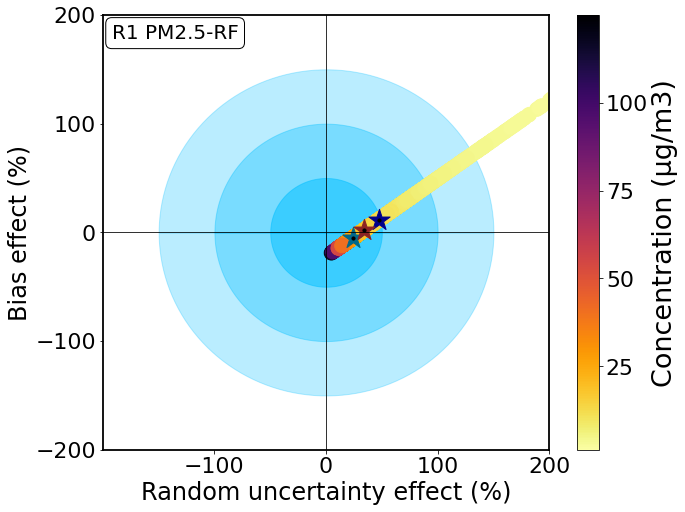

24.359385640817607


In [529]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM2.5-RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')

plt.scatter(Random,Bias,marker=".",s=40, color='black')
U=np.round(np.sqrt(Bias**2+Random**2),1)

plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_2.5_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

X_Train, X_Test, y_Train, y_Test =train_test_split(X, y, test_size = 0.001)
REU_CO=[]
for i in range(1,30):
    regressor=regressor.fit(X_train[:120*i].drop(['Lab1'], axis=1), y_train[:120*i])
    pred = regressor.predict(X_test.drop(['Lab1'], axis=1))
    reu=REF2(pred,y_test,1.35,30000)
    REU_CO.append(reu) 

## Model 5: ANN

In [530]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(3, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_63 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_64 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 101       
Total params: 30,046
Trainable params: 30,046
Non-trainable params: 0
_________________________________________________________________


In [531]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
hist=model.fit(X_train_scaled, y_train, batch_size= 10, epochs=40, verbose= 0)#,validation_split=0.2

In [532]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_CO=sMAPE_lr
RMSE_ann_CO=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_CO=Pearson_lr
R2_ann_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_CO=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-200, C, r'$R^{2}(ANN)=$'+str(R2_ann_CO), fontsize = 14, color='tomato')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-800, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-800, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('ANN Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [533]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_ann=pred
MBE_ANN_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 5.74
Mean squared error(MSE) = 62.06
Median absolute error = 4.26
Explain variance score = 0.59
R2 score = 0.59


fig= plt.figure(figsize=(50,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.plot(index[A:],pred_lr[A:], color='goldenrod',linewidth=3)
plt.plot(index[A:],pred_svr[A:], color='brown',linewidth=3)
plt.plot(index[A:],pred_rf[A:], color='indigo',linewidth=3)
plt.plot(index[A:],pred_ann[A:], color='tomato',linewidth=3)

plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.ylabel('CO Concentration(ppb)',fontsize=18)
plt.legend(['Ref', 'LAB', 'LR','SVR','RF','ANN'], loc = 2, bbox_to_anchor = (0.95,1))
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

In [534]:
REF2(pred,y_test,1,30000)

185.96726490694988

In [535]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

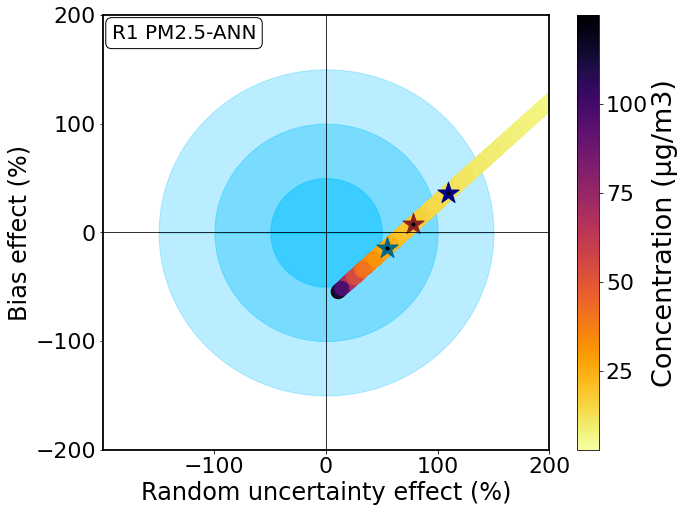

56.51152099480946


In [536]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
#plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM2.5-ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')

plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_2.5_ANN.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

# Model 6: XGBoost

In [537]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)
model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [538]:
pred = model.predict(X_test)
pred_xgb_co=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_CO=sMAPE_lr
RMSE_xgb_CO=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_CO=Pearson_lr
R2_xgb_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_CO=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


In [539]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_xgb=pred
MBE_XGB_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_CO=CRMSE(y_test,pred)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 4.19
Mean squared error(MSE) = 33.35
Median absolute error = 3.16
Explain variance score = 0.78
R2 score = 0.78


In [540]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

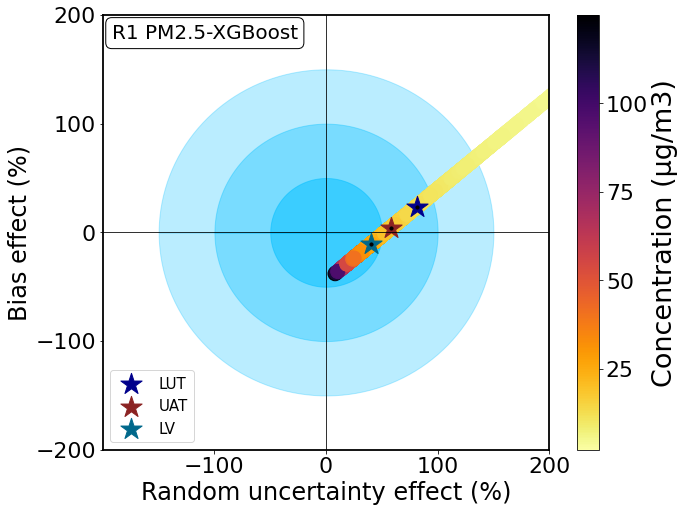

41.96182410050687


In [541]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)


plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM2.5-XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_2.5_XGB.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

# NO2 Calibration

In [542]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [543]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('20min').mean()
NO2_Data=NO2_Data.dropna()
NO2_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_O3
Date,,,,,,,,,,
2019-10-02 11:40:00,460.448301,26.378438,58.063437,15.230400,7.850000,10.0,2.0,2.0,11.0,46.094860
2019-10-02 12:00:00,794.371300,25.632544,48.527009,6.653971,25.045773,10.0,2.0,2.0,12.0,56.858942
2019-10-02 12:20:00,82.998996,26.120078,47.716553,2.844210,13.152720,10.0,2.0,2.0,12.0,58.880540
2019-10-02 15:40:00,566.301152,30.418466,50.153181,10.084125,9.323533,10.0,2.0,2.0,15.0,40.068225
2019-10-03 15:40:00,84.482370,29.421250,52.411845,12.621282,22.596524,10.0,3.0,3.0,15.0,33.473237


In [544]:
#Ref=NO2_Data['Ref'].to_list()
#NO2_Data=NO2_Data[NO2_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

## Model 1: Linear Regression (LR)

In [545]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=R1_data[['Sen_10','T','RH','Month','Day_of_week','Hour']]
y=R1_data['Ref_10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

3497

In [546]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Sen_10'].to_list()
for i in range(len(lab1)):
    if lab1[i]>100:
        lab1[i]=np.mean(lab1)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_NO2=sMAPE_lr
RMSE_lr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_lr_NO2=Pearson_lr
sMAPE_lab_NO2=sMAPE_lab
RMSE_lab_NO2=round(RMSE_lab/np.mean(np.array(lab1)),2)
Pearson_lab_NO2=Pearson_lab
R2_lr_NO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_NO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_NO2=RMSE_lr
RMSE_Lab_NO2=RMSE_lab

A=len(y_test)-200
B=120
D=max(y_test[A:])-0.15*max(y_test[A:])
C=max(y_test[A:])-0.05*max(y_test[A:])
Pearson_lr_NO2,R2_lr_NO2,RMSE_Lr_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.68, 0.46, 21.6)

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C,r'$R^{2}(LR)=$'+str(R2_lr_NO2) , fontsize = 14, color='#513e00')
#plt.text(B-150, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [547]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_NO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_NO2=MBE(lab1,y_test)/(2.6*np.std(y_test))
CRMSE_LAB_NO2=CRMSE(y_test,lab1)/(2.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 14.97
Mean squared error(MSE) = 466.32
Median absolute error = 11.41
Explain variance score = 0.46
R2 score = 0.46


In [548]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

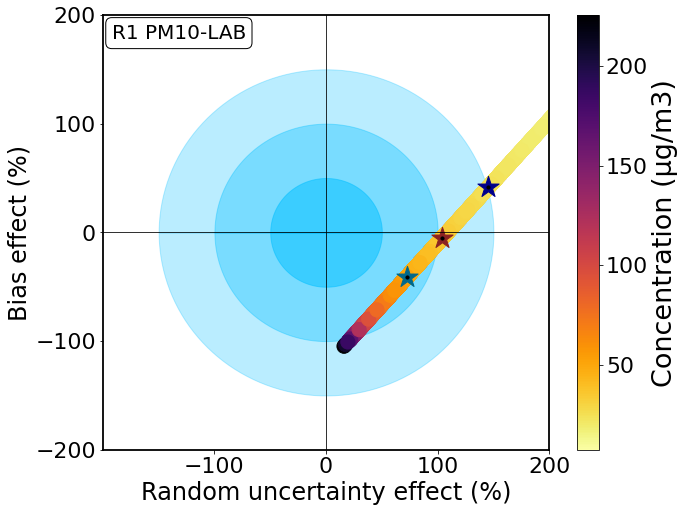

83.36857187557624


In [549]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM10-LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_10_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

In [550]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.005*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

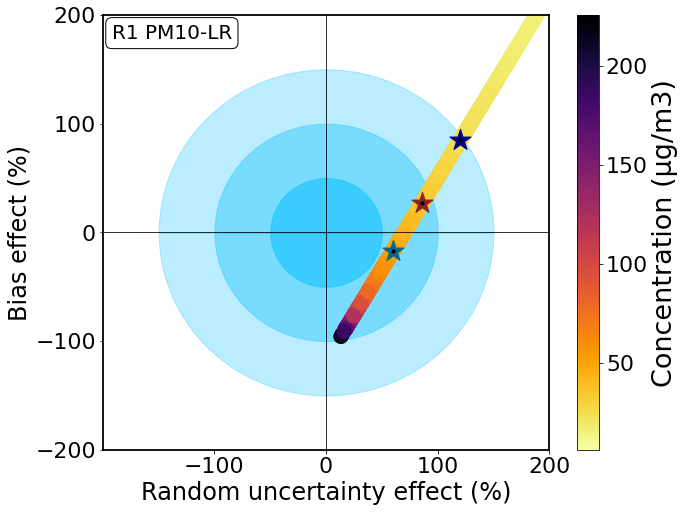

62.51863548997613


In [551]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM10-LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_10_LR.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

## Model 2: Support Vector Regression (SVR)

In [552]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly')
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))

In [553]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_NO2=sMAPE_lr
RMSE_svr_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_svr_NO2=Pearson_lr
R2_svr_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_NO2=RMSE_lr
Pearson_svr_NO2,R2_svr_NO2,RMSE_Svr_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.76, 0.57, 19.1)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(SVR)=$'+str(R2_svr_NO2), fontsize = 14, color='brown')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [554]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 12.67
Mean squared error(MSE) = 366.11
Median absolute error = 8.3
Explain variance score = 0.58
R2 score = 0.57


In [555]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

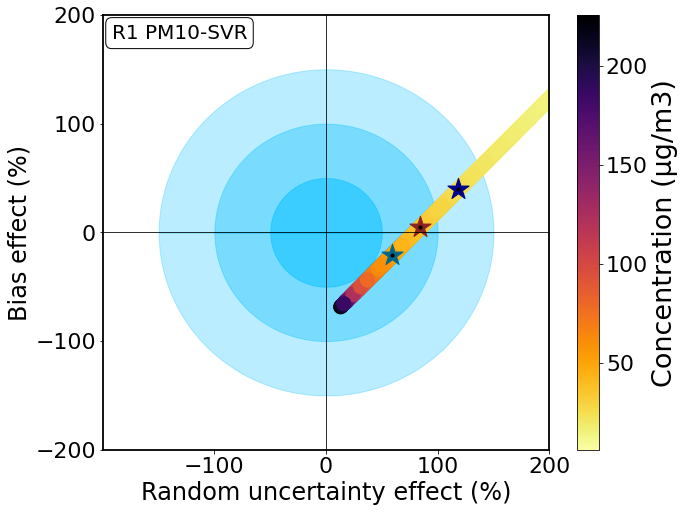

62.91951358432882


In [556]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM10-SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_10_SVR.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

## Model 3: Random Forest

In [557]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,
                                  max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500,
                      random_state=0)

In [558]:
Index=[i for i in range(len(y_test))]
features_NO2=regressor.feature_importances_
pred = regressor.predict(X_test)
pred_rf_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_NO2=sMAPE_lr
RMSE_rf_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_rf_NO2=Pearson_lr
R2_rf_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_NO2=RMSE_lr
Pearson_rf_NO2,R2_rf_NO2,RMSE_Rf_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.95, 0.9, 9.0)

fig= plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-15, C,r'$R^{2}(RF)=$'+str(R2_rf_NO2) , fontsize = 14, color='indigo')
plt.text(B-15, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
plt.text(B-73, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-73, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.xlabel('Last 100 hours of testing period',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [559]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 5.15
Mean squared error(MSE) = 81.75
Median absolute error = 2.55
Explain variance score = 0.9
R2 score = 0.9


In [560]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

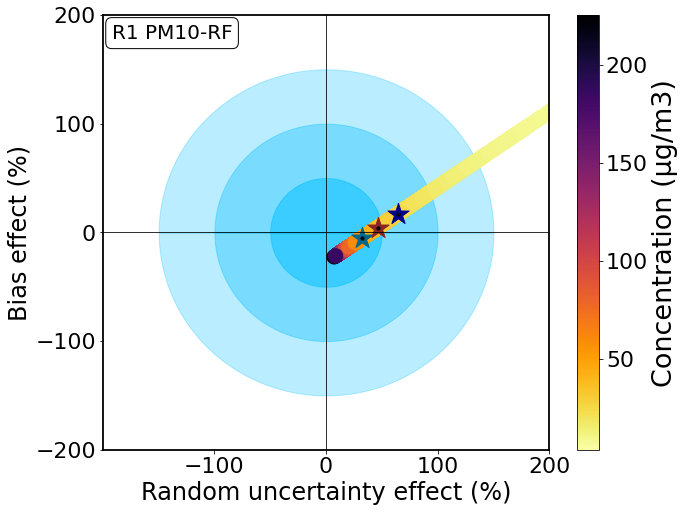

32.79938934237808


In [561]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM10-RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_10_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

## Model 4 : ANN

In [562]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_68 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_69 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_70 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 101       
Total params: 30,451
Trainable params: 30,451
Non-trainable params: 0
_________________________________________________________________


In [563]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=100, verbose= 0)

In [564]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

3497

In [565]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_NO2=sMAPE_lr
RMSE_ann_NO2=round(RMSE_lr/np.mean(np.array(y_test)),2)
Pearson_ann_NO2=Pearson_lr
R2_ann_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_NO2=RMSE_lr
Pearson_ann_NO2,R2_ann_NO2,RMSE_Ann_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.93, 0.86, 10.9)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)',fontsize=18)
#plt.text(B-150, C, r'$R^{2}(ANN)=$'+str(R2_ann_NO2), fontsize = 14, color='tomato')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title(' Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [566]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_NO2=CRMSE(y_test,pred)/(np.std(y_test))
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 7.1
Mean squared error(MSE) = 119.06
Median absolute error = 4.51
Explain variance score = 0.86
R2 score = 0.86


In [567]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

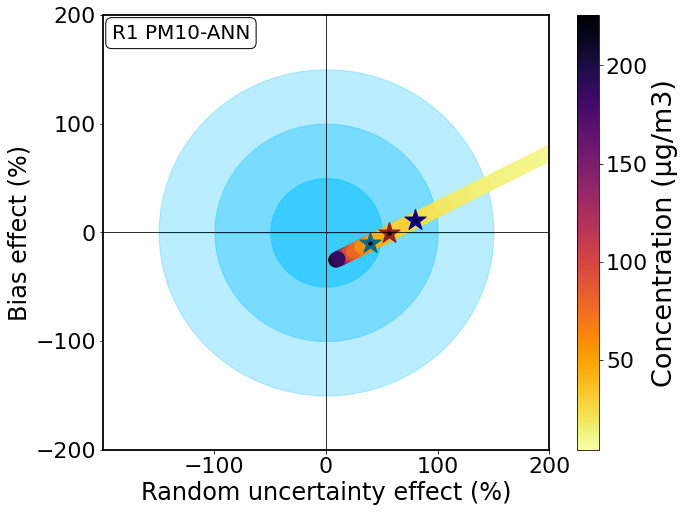

40.8175904765268


In [568]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)


plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM10-ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')

plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_10_ANN.pdf", format="pdf", bbox_inches="tight")
plt.show()
u=np.sqrt((Bias**2+Random**2))
print(u)

# Model 5: XGBoost

In [569]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)
model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [570]:
pred = model.predict(X_test)
pred_xgb_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_NO2=sMAPE_lr
RMSE_xgb_NO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_NO2=Pearson_lr
R2_xgb_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_NO2=RMSE_lr
Pearson_xgb_NO2,R2_xgb_NO2,RMSE_Xgb_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.89, 0.78, 13.6)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.69,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(XGB)=$'+str(R2_xgb_NO2), fontsize = 14, color='darkgoldenrod')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [571]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_NO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 9.06
Mean squared error(MSE) = 184.77
Median absolute error = 6.12
Explain variance score = 0.78
R2 score = 0.78


In [572]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([0.4 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

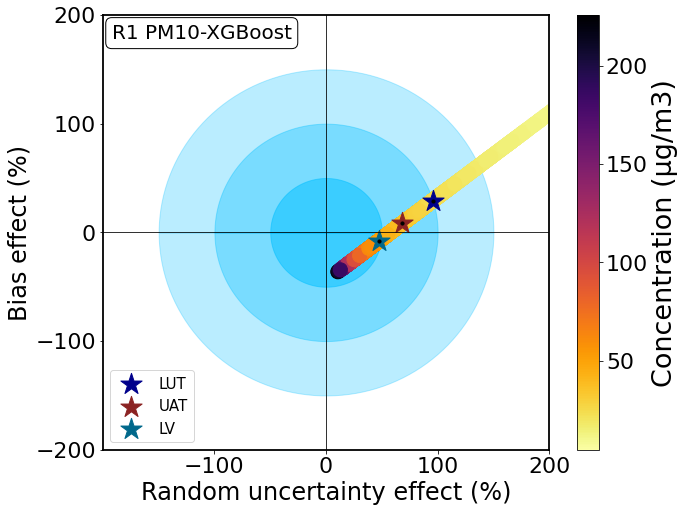

48.397888224419255


In [573]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'R1 PM10-XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_R1_10_XGB.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

 # SO2 Calibration

In [574]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [575]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
CO_Data=CO_Data.resample('20min').mean()
CO_Data=CO_Data.dropna()
SO2_Data.head()

,WE,AE,Temp,RH,Ref,Lab2,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,,,
2019-10-10 04:15:00,342.991196,342.255475,18.268917,81.793083,1.085790,7.660248,0.735722,10,3,10,4
2019-10-10 04:45:00,345.767413,342.543745,18.359000,82.451958,1.163473,15.077802,3.223668,10,3,10,4
2019-10-10 04:50:00,343.919310,342.689191,18.348826,82.572044,1.200187,9.035877,1.230119,10,3,10,4
2019-10-10 04:55:00,343.377326,342.448811,18.353612,82.675760,1.312772,8.189301,0.928515,10,3,10,4
2019-10-10 05:00:00,343.358621,342.322426,18.351611,82.723472,1.237584,8.546278,1.036195,10,3,10,5


# Model 1: Linear Regression (LR)

In [576]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=N3_data[['Sen_2.5','T','RH','Month','Day_of_week','Hour']]
y=N3_data['Ref_2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

4369

In [577]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Sen_2.5'].to_list()
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_SO2=sMAPE_lr
RMSE_lr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_SO2=Pearson_lr
sMAPE_lab_SO2=sMAPE_lab
RMSE_lab_SO2=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_SO2=Pearson_lab
R2_lr_SO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_SO2=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_SO2=RMSE_lr
RMSE_Lab_SO2=RMSE_lab

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


In [578]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=lab1[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100


import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

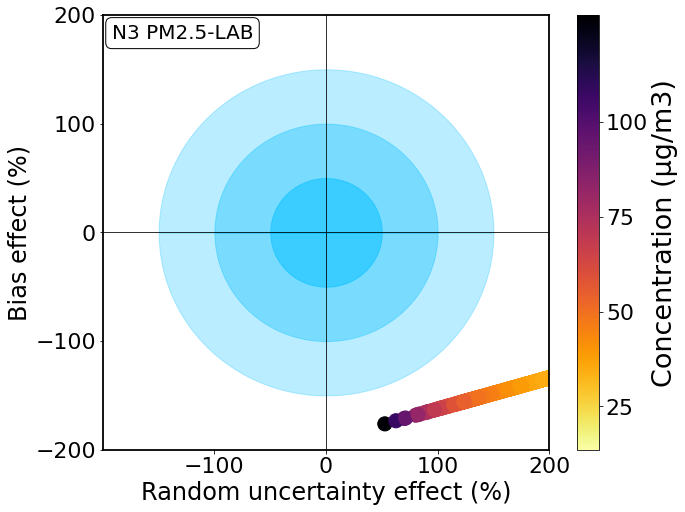

293.30469265370095


In [579]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM2.5-LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_2.5_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

In [580]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

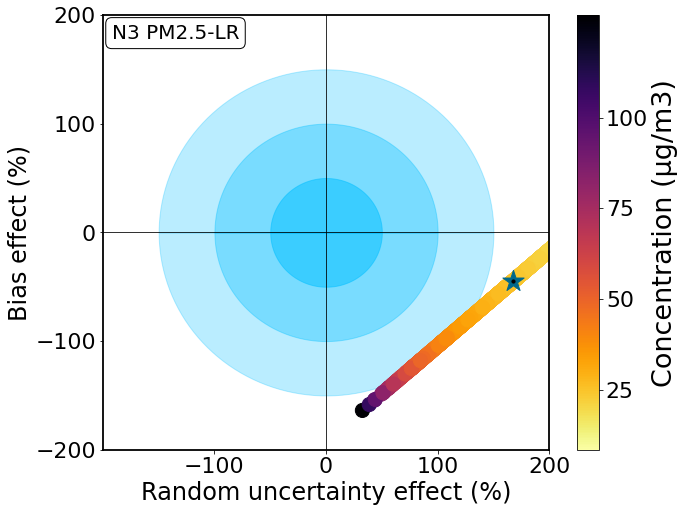

In [581]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM2.5-LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_2.5_LR.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Scaling Laboratory Calibration
For the purpose of visual comparison with the ref and calibrated measurements, the lab measurement was scaled by a factor of 0.05

In [582]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_LR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_SO2=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_SO2=MBE(lab1,y_test)/(25*np.std(y_test))
CRMSE_LAB_SO2=CRMSE(y_test,lab1)/25*(np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 8.71
Mean squared error(MSE) = 131.91
Median absolute error = 7.33
Explain variance score = 0.11
R2 score = 0.1


# Model 2: SVR

In [583]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly',degree=3)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [584]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_SO2=sMAPE_lr
RMSE_svr_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_SO2=Pearson_lr
R2_svr_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_SO2=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(SVR)=$'+str(R2_svr_SO2) , fontsize = 14, color='brown')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-420, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-420, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [585]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 7.56
Mean squared error(MSE) = 130.01
Median absolute error = 5.35
Explain variance score = 0.14
R2 score = 0.12


In [586]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

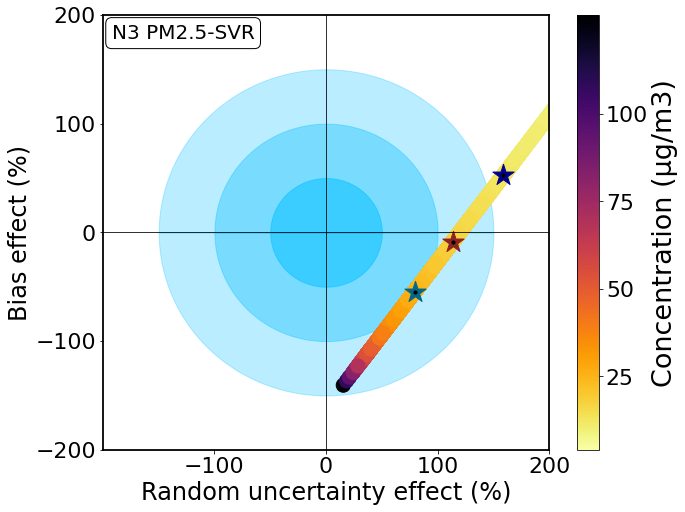

96.32691931112018


In [587]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM2.5-SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_2.5_SVR.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

 # Model 3: Random Forest

In [588]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train)  

In [589]:
Index=[i for i in range(len(y_test))]
features_SO2=regressor.feature_importances_
pred = regressor.predict(X_test)
pred_rf_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_SO2=sMAPE_lr
RMSE_rf_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_SO2=Pearson_lr
R2_rf_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_SO2=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.72,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-20, C,r'$R^{2}(RF)=$'+str(R2_rf_SO2) , fontsize = 14, color='indigo')
plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [590]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 2.35
Mean squared error(MSE) = 13.82
Median absolute error = 1.48
Explain variance score = 0.91
R2 score = 0.91


In [591]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

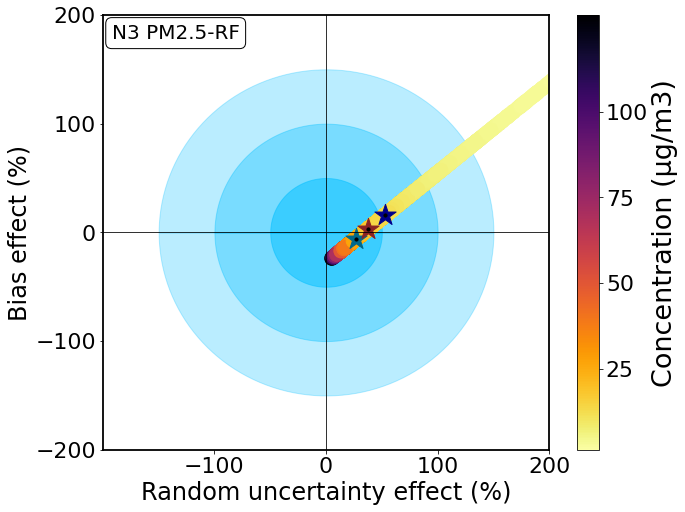

27.169700849295136


In [592]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM2.5-RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_2.5_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

# Model 4 : ANN

In [593]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(50, kernel_initializer='normal',activation= 'relu'))
#model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_73 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_74 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 51        
Total params: 7,439
Trainable params: 7,439
Non-trainable params: 0
_________________________________________________________________


In [594]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 200, epochs=100, verbose= 0)

In [595]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

4369

In [596]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_SO2=sMAPE_lr
RMSE_ann_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_SO2=Pearson_lr
R2_ann_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_SO2=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(ANN)=$'+str(R2_ann_SO2) , fontsize = 14, color='tomato')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [597]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 4.29
Mean squared error(MSE) = 33.57
Median absolute error = 3.28
Explain variance score = 0.77
R2 score = 0.77


In [598]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100


import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

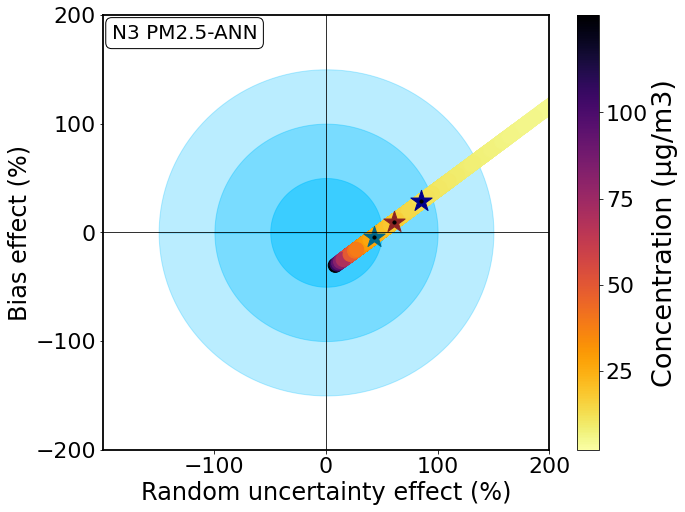

42.89001906913288


In [599]:
pred=np.array(pred)
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM2.5-ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_2.5_ANN.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

# Model 5 : XGBoost

In [600]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [601]:
pred = model.predict(X_test)
pred_xgb_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_SO2=sMAPE_lr
RMSE_xgb_SO2=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_SO2=Pearson_lr
R2_xgb_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_SO2=RMSE_lr

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(XGB)=$'+str(R2_xgb_SO2) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [602]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_SO2=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 4.84
Mean squared error(MSE) = 45.62
Median absolute error = 3.59
Explain variance score = 0.69
R2 score = 0.69


In [603]:
import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=y_test[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/(LV))*100
Random=(2*(P1+P2)**0.5/(LV))*100

import random
alpha=1.4
LV=12.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=17.5
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

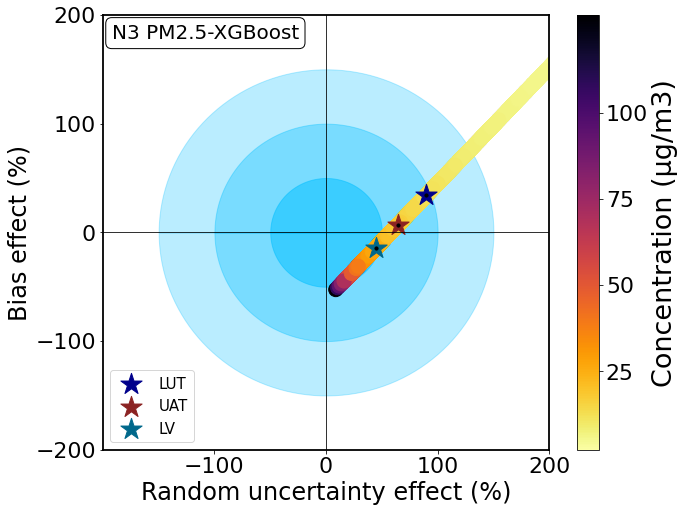

47.00086198138226


In [604]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,25,50,75,100])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM2.5-XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_2.5_XGB.pdf", format="pdf", bbox_inches="tight")
plt.show()
u=np.sqrt((Bias**2+Random**2))
print(u)

# O3 CALIBRATION

In [605]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('20min').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:40:00,621.625704,26.378438,58.063437,46.094860,3.605625,10.0,2.0,2.0,11.0,15.230400
2019-10-02 12:00:00,1037.932435,25.632544,48.527009,56.858942,10.655074,10.0,2.0,2.0,12.0,6.653971
2019-10-02 12:20:00,99.598353,26.120078,47.716553,58.880540,20.285180,10.0,2.0,2.0,12.0,2.844210
2019-10-07 10:40:00,108.196313,32.344264,37.260757,47.259008,11.447809,10.0,0.0,7.0,10.0,4.255772
2019-10-07 11:00:00,123.884374,33.621877,36.522761,41.416863,8.541809,10.0,0.0,7.0,11.0,16.150580


In [606]:
#Ref=O3_Data['Ref'].to_list()
#O3_Data=O3_Data[O3_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#O3_Data.shape

## Model 1: LR

In [607]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=N3_data[['Sen_10','T','RH','Month','Day_of_week','Hour']]
y=N3_data['Ref_10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_test)

4369

In [608]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Sen_10'].to_list()
for i in range(len(lab1)):
    if lab1[i]>370:
        lab1[i]=np.mean(lab1)
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_O3=sMAPE_lr
RMSE_lr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_lr_O3=Pearson_lr
sMAPE_lab_O3=sMAPE_lab
RMSE_lab_O3=RMSE_lab/np.mean(np.array(lab1))
Pearson_lab_O3=Pearson_lab
R2_lr_O3=round(sm.r2_score(y_test, pred), 2)
R2_lab_O3=round(sm.r2_score(y_test, lab1), 2)
RMSE_Lr_O3=RMSE_lr
RMSE_Lab_O3=RMSE_lab

A=len(y_test)
D=max(lab1)-0.10*max(lab1)
C=max(lab1)-0.03*max(lab1)
B=A

Pearson_lr_O3,R2_lr_O3,RMSE_Lr_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.38, 0.14, 27.3)

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,len(y_test)+1)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='#513e00',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(LR)=$'+str(R2_lr_O3) , fontsize = 14, color='#513e00')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [609]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_O3=CRMSE(y_test,pred)/np.std(y_test)
MBE_LAB_O3=MBE(lab1,y_test)/(3.6*np.std(y_test))
CRMSE_LAB_O3=CRMSE(y_test,lab1)/(3.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 19.92
Mean squared error(MSE) = 744.2
Median absolute error = 15.19
Explain variance score = 0.14
R2 score = 0.14


In [610]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(lab1)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

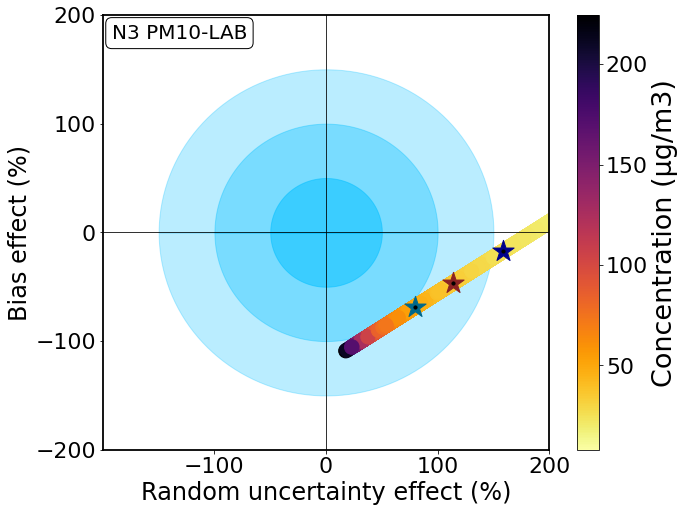

105.09581989186421


In [611]:
A4=target(lab1,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)


plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM10-LAB'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_10_LAB.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

In [612]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

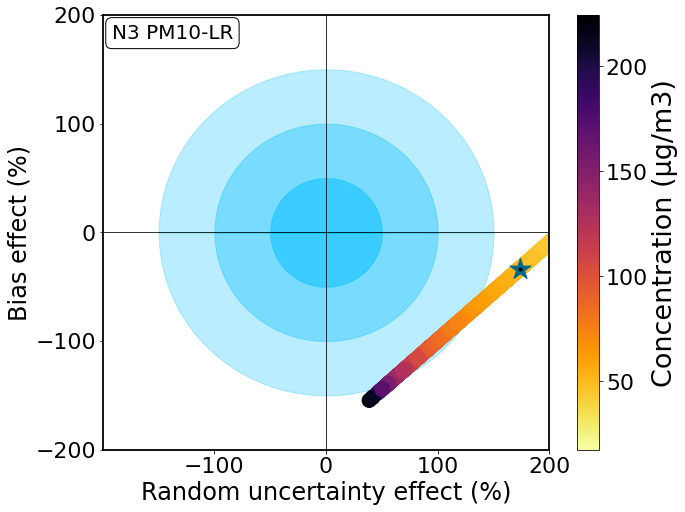

176.81849630756554


In [613]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)


plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM10-LR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_10_LR.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

## Model 2: SVR

In [614]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'poly', degree=3)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [615]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_O3=sMAPE_lr
RMSE_svr_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_svr_O3=Pearson_lr
R2_svr_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_O3=RMSE_lr
Pearson_svr_O3,R2_svr_O3,RMSE_Svr_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.25, -0.61, 37.3)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='brown',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(SVR)=$'+str(R2_svr_O3) , fontsize = 14, color='brown')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression(SVR) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [616]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 17.84
Mean squared error(MSE) = 1394.06
Median absolute error = 10.88
Explain variance score = -0.56
R2 score = -0.61


In [617]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

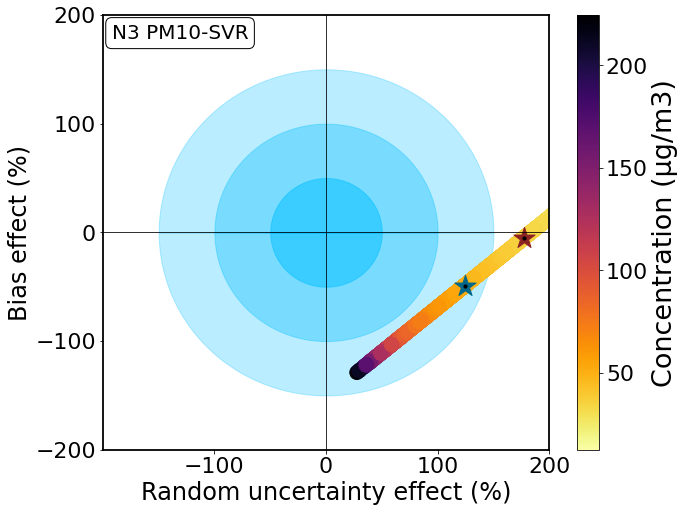

133.52646391844388


In [618]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)


plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM10-SVR'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_10_SVR.pdf", format="pdf", bbox_inches="tight")
plt.show()
u=np.sqrt((Bias**2+Random**2))
print(u)

##  Model 3 : Random Forest

In [619]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500,
                      random_state=0)

In [620]:
Index=[i for i in range(len(y_test))]
features_O3=regressor.feature_importances_
pred = regressor.predict(X_test)
pred_rf_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_O3=sMAPE_lr
RMSE_rf_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_rf_O3=Pearson_lr
R2_rf_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_O3=RMSE_lr
Pearson_rf_O3,R2_rf_O3,RMSE_Rf_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.95, 0.9, 9.5)

fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='indigo',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-22, C,r'$R^{2}(RF)=$'+str(R2_rf_O3) , fontsize = 14, color='indigo')
plt.text(B-22, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-72, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-72, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 100 hours of testing period',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [621]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_RF_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 5.77
Mean squared error(MSE) = 90.32
Median absolute error = 3.24
Explain variance score = 0.9
R2 score = 0.9


In [622]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

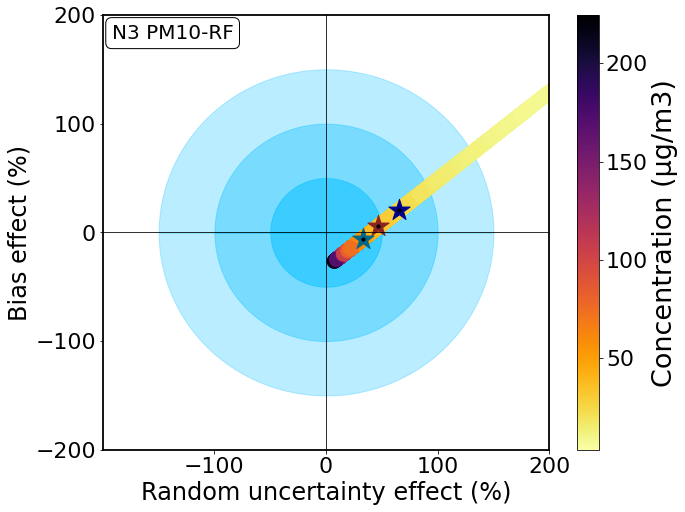

33.44390009774283


In [623]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM10-RF'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_10_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()
u=np.sqrt((Bias**2+Random**2))
print(u)

## Model 4: ANN

In [624]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (6,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_77 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_79 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 101       
Total params: 30,451
Trainable params: 30,451
Non-trainable params: 0
_________________________________________________________________


In [625]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=200, verbose= 0)

In [626]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

4369

In [627]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_O3=sMAPE_lr
RMSE_ann_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_ann_O3=Pearson_lr
R2_ann_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_O3=RMSE_lr
Pearson_ann_O3,R2_ann_O3,RMSE_Ann_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.94, 0.88, 10.4)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='tomato',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppm)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(ANN)=$'+str(R2_ann_O3) , fontsize = 14, color='tomato')
#plt.text(B-5, D, r'$R^{2}(Lab)=$'+str(R2_lab_O3), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [628]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 6.63
Mean squared error(MSE) = 107.32
Median absolute error = 4.37
Explain variance score = 0.88
R2 score = 0.88


In [629]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

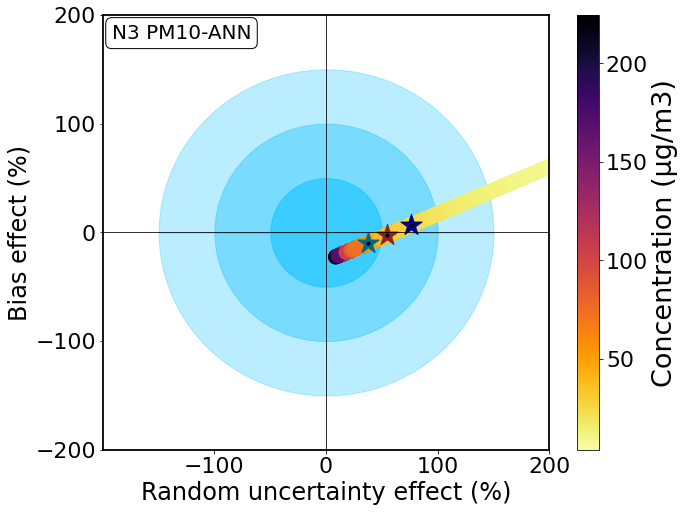

39.2887805649644


In [630]:
pred=np.array(pred)
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)



plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
#plt.grid(linestyle='-.',linewidth=0.4)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM10-ANN'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')
plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_10_ANN.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)

# Model 5:  XGBoost

In [631]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.01, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.00999999978, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [632]:
pred = model.predict(X_test)
pred_xgb_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_O3=sMAPE_lr
RMSE_xgb_O3=RMSE_lr/np.mean(np.array(y_test))
Pearson_xgb_O3=Pearson_lr
R2_xgb_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_O3=RMSE_lr
Pearson_xgb_O3,R2_xgb_O3,RMSE_Xgb_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.86, 0.74, 14.9)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='darkgoldenrod',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(XGB)=$'+str(R2_xgb_O3) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [633]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_XGB_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_O3=CRMSE(y_test,pred)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 10.54
Mean squared error(MSE) = 222.56
Median absolute error = 7.3
Explain variance score = 0.74
R2 score = 0.74


In [634]:
import random
alpha=1.4
LV=50
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([1 for i in range(len(ref))])
u=prec
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias=(2*(P3)/LV)*100
Random=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=25
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias1=(2*(P3)/LV)*100
Random1=(2*(P1+P2)**0.5/LV)*100

import random
alpha=1.4
LV=35
Cal=0
for i in range(len(y_test)):
    if y_test[i]==LV:
        Cal=pred[i]
cal=np.array(pred)
ref=np.array(y_test)
ref_mean=np.mean(ref)
cal_mean=np.mean(cal)
prec=np.array([20 for i in range(len(ref))])
u=0.001*ref
#cal=np.log(cal)
#ref=np.log(ref)
sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
#beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
beta_0=cal_mean-beta_1*ref_mean
RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
Beta_0=cal_mean-Beta_1*ref_mean
P1=(RSS/(len(cal)-2))
P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
P3=(Beta_0+(Beta_1-1)*LV)
P=P1+P2+P3
Bias2=(2*(P3)/LV)*100
Random2=(2*(P1+P2)**0.5/LV)*100

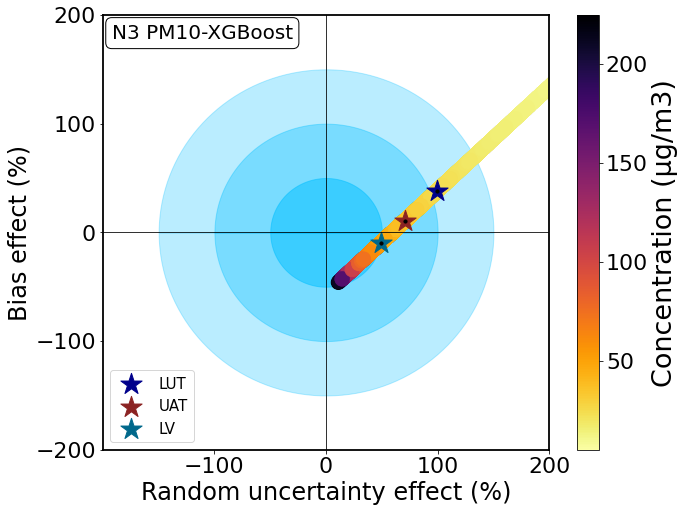

50.44040310948578


In [635]:
A4=target(pred,y_test,1.4)
theta = np.linspace( 0 , 2 * np.pi , 150 )
r1 =50
a1= r1 * np.cos( theta )
b1= r1 * np.sin( theta )
r2 =100
a2=r2* np.cos( theta )
b2=r2* np.sin( theta )
r3 =150
a3=r3* np.cos( theta )
b3=r3* np.sin( theta )

r4 =200
a4=r4* np.cos( theta )
b4=r4* np.sin( theta )
fig= plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
plt.legend(['LUT','UAT','LV'],loc =2, bbox_to_anchor = (0,0.2), fontsize=15)


plt.Circle((0, 0), 1, color='wheat')
#plt.vlines([0], -130, 130, linestyles='dashed',color='violet')
#plt.hlines([0], -130, 130, linestyles='dashed', color='violet')

plt.fill_between(a1, b1, color='#00BFFF', alpha=0.5)
plt.fill_between(a2, b2, color='#00BFFF',alpha=0.35)
plt.fill_between(a3, b3, color='#00BFFF',alpha=0.27)
#plt.fill_between(a4, b4, color='#008B8B',alpha=0.17)

x1=np.arange(0,50.1,0.1)
r1=50
y1=np.sqrt(r1**2-x1**2)
x2=np.arange(0,100.1,0.1)
r2=100
y2=np.sqrt(r2**2-x2**2)

x3=np.arange(0,150.1,0.1)
r3=150
y3=np.sqrt(r3**2-x3**2)

x4=np.arange(0,200.1,0.1)
r4=200
y4=np.sqrt(r4**2-x4**2)


plt.scatter(1000,1000,marker="*",s=500, color='#00008B')
plt.scatter(1000,1000, marker="*",s=500, color='#8B2323')
plt.scatter(1000,1000,marker="*",s=500, color='#00688B')
plt.xlabel('Random uncertainty effect (%)',fontsize=24)
plt.ylabel('Bias effect (%)',fontsize=24)
#plt.title('CO',fontsize=18)
ticks = np.linspace(0, pred.max(), 20, endpoint=True)
color_map = plt.cm.get_cmap('inferno')
reversed_color_map = color_map.reversed()
plt.scatter(A4[0],A4[1],marker='.',s=800,c=np.array(A4[2]),cmap=reversed_color_map )
#plt.scatter(A4[3],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
#plt.scatter(A4[4],A4[1],marker='.',s=10,c=np.array(A4[2])/1000,cmap=reversed_color_map)
plt.vlines([0], -230, 230,color='black',linewidth=0.8)
plt.hlines([0], -230, 230, color='black',linewidth=0.8)
plt.ylim(ymin=-200)
plt.ylim(ymax=200)
plt.xlim(xmax=200)
plt.xlim(xmin=-199)
plt.xticks(np.arange(-200,201),fontsize=22)
plt.xticks([-100,0,100,200],fontsize=22)

plt.yticks(np.arange(-200,205, 100),fontsize=22)
#plt.colorbar()
cbar = plt.colorbar(ticks=[0,50,100,150,200])
cbar.ax.tick_params(labelsize=22)
cbar.set_label('Concentration (µg/m3)', rotation=90,fontsize=27)
plt.scatter(Random,Bias,marker="*",s=500, color='#00688B')
textstr = 'N3 PM10-XGBoost'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.scatter(Random1,Bias1,marker="*",s=500, color='#00008B')
plt.scatter(Random2,Bias2,marker="*",s=500, color='#8B2323')
plt.scatter(Random1,Bias1,marker=".",s=40, color='black')
plt.scatter(Random2,Bias2,marker=".",s=40, color='black')
plt.scatter(Random,Bias,marker=".",s=40, color='black')

plt.setp(ax.spines.values(), linewidth=1.8)
plt.savefig("Opc_dqo_N3_10_XGB.pdf", format="pdf", bbox_inches="tight")
plt.show()

u=np.sqrt((Bias**2+Random**2))
print(u)